In [163]:
#Dropbox/KAROLINSKA/modeling
###### Code used for the simulations of L2: Dropbox/KAROLINSKA/modeling/simulations_broadening_eccentricity.ipynb
###### Code used for the simulations of L1: Dropbox/KAROLINSKA/modeling/simulations_radial_dimension_1stim.py

In [164]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import polyfit, poly1d
from scipy.signal import savgol_filter


In [165]:
Matrix_B1_size=np.load('C:\\Users\\David\\Dropbox\\KAROLINSKA\\modeling\\Bump_size.npy')
Matrix_B1_mean=np.load('C:\\Users\\David\\Dropbox\\KAROLINSKA\\modeling\\Bump_mean.npy')
simul_B1_mean=np.load('C:\\Users\\David\\Dropbox\\KAROLINSKA\\modeling\\B1_mean.npy')
simul_B2_mean=np.load('C:\\Users\\David\\Dropbox\\KAROLINSKA\\modeling\\B2_mean.npy')


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\ex

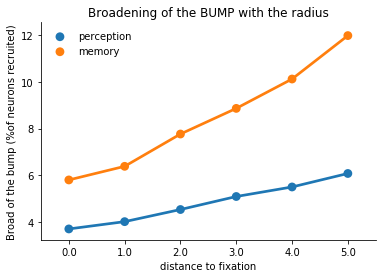

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 2.976e+04
Date:                Thu, 14 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:45:50   Log-Likelihood:                -173.56
No. Observations:                1187   AIC:                             355.1
Df Residuals:                    1183   BIC:                             375.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [166]:
### Size of the bump

B1_simulations_size_corr=[[] for i in range(0, 6)]
N=1000

for simul in range(0, 6):
    for i in range(0, N):
        B1_simulations_size_corr[simul].append(     np.mean(       Matrix_B1_size[simul, i,:][Matrix_B1_size[simul, i,:]!=0]       )/ N  *  100)


#each bump
bump1=np.array(B1_simulations_size_corr[0])[~np.isnan(np.array(B1_simulations_size_corr[0]))]
bump2=np.array(B1_simulations_size_corr[1])[~np.isnan(np.array(B1_simulations_size_corr[1]))]
bump3=np.array(B1_simulations_size_corr[2])[~np.isnan(np.array(B1_simulations_size_corr[2]))]
bump4=np.array(B1_simulations_size_corr[3])[~np.isnan(np.array(B1_simulations_size_corr[3]))]
bump5=np.array(B1_simulations_size_corr[4])[~np.isnan(np.array(B1_simulations_size_corr[4]))]
bump6=np.array(B1_simulations_size_corr[5])[~np.isnan(np.array(B1_simulations_size_corr[5]))]

a=np.zeros((len(bump1), 2))
a[:,0]=bump1

b=np.ones((len(bump2), 2))
b[:,0]=bump2

c=np.zeros((len(bump3), 2))
c[:,0]=bump3
c[:,1]=[2 for i in range(0, len(c))]

d=np.zeros((len(bump4), 2))
d[:,0]=bump4
d[:,1]=[3 for i in range(0, len(d))]

e=np.zeros((len(bump5), 2))
e[:,0]=bump5
e[:,1]=[4 for i in range(0, len(e))]

f=np.zeros((len(bump6), 2))
f[:,0]=bump6
f[:,1]=[5 for i in range(0, len(f))]


##model
M_analysis=np.vstack((a,b,c,d,e,f))
times = list(range(len(a))) + list(range(len(b))) + list(range(len(c))) + list(range(len(d))) + list(range(len(e))) + list(range(len(f))) 

df = pd.DataFrame({"size": M_analysis[:,0], "radius": M_analysis[:,1], "times": times})
df['time_labels'] = df['times'].copy()
df['time_labels'][(df['times']>100) & (df['times']<200)] = 'perception'
df['time_labels'][df['times']>len(bump1)-100 ] = 'memory'

df_analysis = df.loc[ (df['time_labels']=='perception') + (df['time_labels']=='memory')  ]

####
sns.pointplot(x='radius', y='size', hue='time_labels', x_estimator=np.mean, ci=95, legend=False, data=df_analysis)
plt.legend(frameon=False)
plt.title('Broadening of the BUMP with the radius')
plt.xlabel('distance to fixation')
plt.ylabel('Broad of the bump (%of neurons recruited)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()

result = smf.ols(formula="size ~ radius*time_labels", data=df_analysis).fit()
print(result.summary() )



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


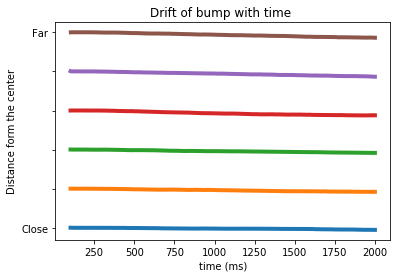

y =  
0.001434 x - 0.1855
y =  
0.01818 x + 0.07222


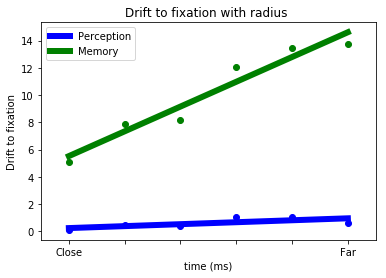

In [167]:

######## Position of the bump

totalTime=2000;
dt=2;

B1_simulations_mean_corr=[[] for i in range(0, 6)]

for simul in range(0, 6):
    for i in range(0, N):
        B1_simulations_mean_corr[simul].append(     np.mean(       Matrix_B1_mean[simul, i,:][Matrix_B1_mean[simul, i,:]!=0]       ))



###
plt.figure()
plt.title('Drift of bump with time ') #(corrected)
plt.ylabel('Distance form the center')
plt.xlabel('time (ms)')

for i in range(0, 6):
    plt.plot(np.arange(0, totalTime, dt), B1_simulations_mean_corr[i], linewidth=4 )



y = np.array([300,400,500,600,700,800])
my_xticks = ['Close', '', '', '', '', 'Far']
plt.yticks(y, my_xticks)
plt.show(block=False)

####

plt.figure()
plt.title('Drift to fixation with radius ') #(corrected)
plt.ylabel('Drift to fixation')
plt.xlabel('time (ms)')


initials=[300,400,500,600,700,800]

for i in range(0, 6):
    plt.plot(initials[i], abs(initials[i] - B1_simulations_mean_corr[i][-1]), 'go' )
    plt.plot(initials[i], abs(initials[i] - B1_simulations_mean_corr[i][200]), 'bo' )



x = np.array([300,400,500,600,700,800])
my_xticks = ['Close', '', '', '', '', 'Far']
plt.xticks(x, my_xticks)
plt.xlim(250,850)

x=P[:,1]
y=P[:,0]
coefs=np.polyfit(x,y,1) 
polinomio=np.poly1d(coefs)
#print the function
print('y = '  + str(polinomio) )
#get te line with the expected ys
ys=polinomio(x)
#plt.plot(x,y, 'ro')
plt.plot(x,ys, 'b', linewidth=6, label='Perception')


x=M[:,1]
y=M[:,0]
coefs=np.polyfit(x,y,1) 
polinomio=np.poly1d(coefs)
#print the function
print('y = '  + str(polinomio) )
#get te line with the expected ys
ys=polinomio(x)
#plt.plot(x,y, 'ro')
plt.plot(x,ys, 'g', linewidth=6, label='Memory')
plt.legend(loc=2)

plt.show(block=False)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


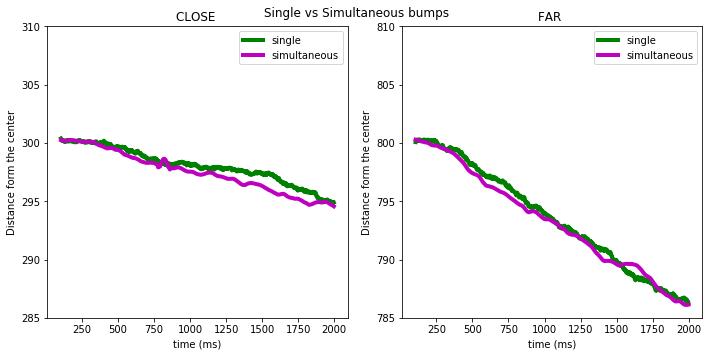

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [168]:
## Compare with simultaneous bumps (L2)

#simultaneous
B1_simulations_mean_corr=[]
B2_simulations_mean_corr=[]

for i in range(0, N):
    B1_simulations_mean_corr.append(     np.mean(       simul_B1_mean[i,:][simul_B1_mean[i,:]!=0]       ))
    B2_simulations_mean_corr.append(     np.mean(       simul_B2_mean[i,:][simul_B2_mean[i,:]!=0]       ))


y = np.array(B1_simulations_mean_corr)[~np.isnan(B1_simulations_mean_corr)]
nans=np.array(B1_simulations_mean_corr)[np.isnan(B1_simulations_mean_corr)]
yhat = savgol_filter(y, 35, 2)
B1_simulations_mean_corr_f = list(nans) + list(yhat)

y = np.array(B2_simulations_mean_corr)[~np.isnan(B2_simulations_mean_corr)]
nans=np.array(B2_simulations_mean_corr)[np.isnan(B2_simulations_mean_corr)]
yhat = savgol_filter(y, 35, 2)
B2_simulations_mean_corr_f = list(nans) + list(yhat)
    
    

#Single
B1_alone_mean_corr=[[] for i in range(0, 6)]
for simul in range(0, 6):
    for i in range(0, N):
        B1_alone_mean_corr[simul].append(     np.mean(       Matrix_B1_mean[simul, i,:][Matrix_B1_mean[simul, i,:]!=0]       ))



### Drift comparison        
### Close Bump:
totalTime=2000;
dt=2;

plt.figure(figsize=(10,5))
plt.suptitle('Single vs Simultaneous bumps')

plt.subplot(1,2,1)
plt.title('CLOSE ') 
plt.ylabel('Distance form the center')
plt.xlabel('time (ms)')
plt.plot(np.arange(0, totalTime, dt), B1_alone_mean_corr[0], linewidth=4, color='g', label='single' )
plt.plot(np.arange(0, totalTime, dt), B1_simulations_mean_corr_f, linewidth=4, color='m', label='simultaneous')
plt.ylim(285,310)
plt.legend()

plt.subplot(1,2,2)
plt.title('FAR ') 
plt.ylabel('Distance form the center')
plt.xlabel('time (ms)')
plt.plot(np.arange(0, totalTime, dt), B1_alone_mean_corr[5], linewidth=4, color='g', label='single' )
plt.plot(np.arange(0, totalTime, dt), B2_simulations_mean_corr_f, linewidth=4, color='m', label='simultaneous')
plt.ylim(785,810)
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))


# plt.suptitle('Single vs Simultaneous bumps')

# plt.subplot(1,2,1)
# plt.title('CLOSE ') 
# plt.ylabel('Distance form the center')
# plt.xlabel('time (ms)')
# plt.plot(np.arange(0, totalTime, dt), B1_alone_mean_corr[0], linewidth=4, color='g', label='single' )
# plt.plot(np.arange(0, totalTime, dt), B1_simulations_mean_corr, linewidth=4, color='m', label='simultaneous')
# plt.ylim(285,310)
# plt.legend()


# plt.subplot(1,2,2)
# plt.title('FAR ') 
# plt.ylabel('Distance form the center')
# plt.xlabel('time (ms)')
# plt.plot(np.arange(0, totalTime, dt), B1_alone_mean_corr[5], linewidth=4, color='g', label='single' )
# plt.plot(np.arange(0, totalTime, dt), B2_simulations_mean_corr, linewidth=4, color='m', label='simultaneous')
# plt.ylim(785,810)
# plt.legend()


# plt.tight_layout()
# plt.show()



In [169]:
###### Code used for the simulations: Dropbox/KAROLINSKA/modeling/simulations_radial_dimension_1stim.py


# from math import floor, exp, sqrt, pi
# import cmath
# from numpy import zeros, arange, where, random, ones, mean, reshape, dot, array, flipud, shape, isnan, sort, save, vstack, load
# import matplotlib.pyplot as plt
# from itertools import chain
# import os
# import numpy.random as npr
# import statsmodels.formula.api as smf
# import pandas as pd

# os.chdir('/home/david/Dropbox/IDIBAPS/my code/Project 1 (master thesis)')
# from aux_functions import *

# os.chdir('/home/david/Desktop/simulation_images')



# ######  Simulations with just one stimulus (like in the control conditions) in different radius (we observe this broadening of the bump with the radius)



# ##### functions
# ##### return the amount of neurons involved in each bump and where does it start
# def spread_start(rE):
#     M=(rE>2)*1
#     M=list(M)
    
#     a=0
#     number_pop=[]
#     counter=[]
#     count=0
    
#     for i in M:
#         count+=1
#         if i ==1:
#             a+=1
#             if a==5:
#                 counter.append(count-5)
        
#         elif i ==0:
#             if a>5:
#                 number_pop.append(a)
#                 a=0
#             else:
#                 a=0
    
    
#     return number_pop, counter









# ######
# number_simulations=100

# totalTime=2000;
# dt=2;
# nsteps=int(floor(totalTime/dt));
# num_cicles=10;

    
# N=1000;

# #temporal variable (largerT means smaller firing rate)
# tauE=  9; 
# tauI=  4; 

# #Conductances (larger G means larger firing rate). Diff cond. for connections
# GEE=  0.014925; 
# Ns=range(0,N);
# GEEs=[round(Ns[i]*2.2e-07+ 0.0148 , 5) for i in range(0, len(Ns))]

# GEI=  0.00445; 
# GIE=   0.009; 
# GII=   0.00001; 
# I0E=  0.2;
# I0I=  0.5; 

# #Realted with noise
# sigE=  0.5 ;
# sigI= 1.3 ;


# #Stimulus (when on and off, separation between them and strenght)
# stim_onset = 100;
# stim_offset = 300;


# n_stims=1; #2
# n_pre=3; 
# n_post=8;  



# Matrix_B1_size=zeros((6, N, number_simulations))
# #Matrix_B2_size=zeros((6, N, number_simulations))
# Matrix_B1_mean=zeros((6, N, number_simulations))
# #Matrix_B2_mean=zeros((6, N, number_simulations))


# #radius locations from 0 to 10 (0 is close to fixation and 10 far) n_inicial is 1000 si N must not be more than 1000
# n_final=10;
# n_inicial=arange(0,n_final,0.01);
# n_inicial=[round(n_inicial[i], 4) for i in range(0, len(n_inicial))];



# alfa_E= 0.00055; 
# alfa_I= 0.00005; #alfa_I ha de ser mayor a alfa E, ya que la inhibición ha de ser una gausiana mas ancha




# for different_distances in range(0,6):
#     if different_distances==0:
#         n_pre=3
#         os.chdir('/home/david/Desktop/simulation_images/3')
#     elif different_distances==1:
#         n_pre=4
#         os.chdir('/home/david/Desktop/simulation_images/4')
#     elif different_distances==2:
#         n_pre=5        
#         os.chdir('/home/david/Desktop/simulation_images/5')
#     elif different_distances==3:
#         n_pre=6
#         os.chdir('/home/david/Desktop/simulation_images/6')
#     elif different_distances==4:
#         n_pre=7
#         os.chdir('/home/david/Desktop/simulation_images/7')
#     elif different_distances==5:
#         n_pre=8
#         os.chdir('/home/david/Desktop/simulation_images/8')
    
#     for simul in range(0, number_simulations):
        
        
#         rE=zeros((N,1));
#         rI=zeros((N,1));
    
        
#         sigmas_E= [round(alfa_E* n_inicial[i]**1.80 +0.035, 4) for i in range(0, len(n_inicial))]; 
#         sigmas_I=[round(alfa_I* n_inicial[i]**2.37 + 0.041, 4) for i in range(0, len(n_inicial))]; 
        
        
        
#         v_E=zeros((N));
#         v_I=zeros((N));
#         WE=zeros((N,N));
#         WI=zeros((N,N));
        
        
        
#         for j in range(0, N): #para cada distancia hay una sigma diferente
#             for i in range(0, N): #dentro de cada distancia se calcula la conectividad con el resto teniendo en cuenta una j concreta (una sigma especifica)
#                 v_E[i]=1/(sqrt(2*pi)*sigmas_E[j])*exp(-((n_inicial[j]-n_inicial[i])**2)/(2*sigmas_E[j])**2);
#                 v_I[i]=1/(sqrt(2*pi)*sigmas_I[j])*exp(-((n_inicial[j]-n_inicial[i])**2)/(2*sigmas_I[j])**2);
            
#             WE[:,j]=v_E;
#             WI[:,j]=v_I;
        
        
        
        
#         #### stims
#         stimulus1=zeros((N));
#         stimulus2=zeros((N));
        
        
#         for i in range(0, N):
#             stimulus1[i]=round(1/(sqrt(2*pi)*sigmas_E[n_pre*100])*exp(-((n_pre-n_inicial[i])**2)/(2*sigmas_E[n_pre*100])**2), 4);
        
        
#         for i in range(0, N):
#             stimulus2[i]=round(1/(sqrt(2*pi)*sigmas_E[n_post*100])*exp(-((n_post-n_inicial[i])**2)/(2*sigmas_E[n_post*100])**2), 4);
        
        
#         #the shape is going to be important later on
#         if n_stims==2:
#             stimulus= (stimulus1 + stimulus2);
#             stimulus=reshape(stimulus, (N,1))
#         elif n_stims==1:
#             stimulus2=zeros((N));
#             stimulus= (stimulus1 + stimulus2);
#             stimulus=stimulus1
#             stimulus=reshape(stimulus, (N,1))
        
        
        
        
#         stimon = floor(stim_onset/dt);
#         stimoff = floor(stim_offset/dt);
        
        
#         WE_GEE=zeros((N,N));
#         for j in range(0,N):
#             s=GEEs[j]*WE[:,j];
#             WE_GEE[:,j]=s;
        
        
        
#         #generation of the noise and the connectivity between inhib and exit
#         RE=zeros((N,nsteps));
#         RI=zeros((N,nsteps));
        
        
#         f = lambda x : x*x*(x>0)*(x<1) + reshape(array([cmath.sqrt(4*x[i]-3) for i in range(0, len(x))]).real, (N,1)) * (x>=1)
        
        
        
        
#         for i in range(0, nsteps):
#             noiseE = sigE*random.randn(N,1);
#             noiseI = sigI*random.randn(N,1);
            
#             #differential equations for connectivity
#             IE= dot(WE_GEE,rE) - GIE*dot(WI,rI) + I0E*ones((N,1)); #Antes el primer término era: GEE*WE*rE ahora solo esta WE_GEE ya que hay una GEE para cada distancia
#             II= GEI*dot(WE,rE) +  (I0I-GII*mean(rI))*ones((N,1));
            
#             if i>stimon and i<stimoff:
#                 IE=IE+stimulus;
#                 II=II+stimulus;
            
            
#             #rates of exit and inhib
#             rE = rE + (f(IE) - rE + noiseE)*dt/tauE;
#             rI = rI + (f(II) - rI + noiseI)*dt/tauI;
            
#             rEr=reshape(rE, N)
#             rIr=reshape(rI, N)
#             #drawnow
#             RE[:,i] = rEr;
#             RI[:,i] = rIr;
            
        
        
        
        
        
#         ############################ 
#         ############################
#         ### Plot of connectivities
#         ############################ 
#         ############################
        
#         #plt.figure()
#         #plt.title('WE')
#         #plt.plot(WE[:, 0:N:100] ,'b', linewidth=2)
#         #plt.show(block=False)
#         #
#         #plt.figure()
#         #plt.title('WI')
#         #plt.plot(WI[:, 0:N:100] ,'g', linewidth=2)
#         #plt.show(block=False)
        
        
        
#         ############################ 
#         ############################
#         ### Plot of activity
#         ############################ 
#         ############################
        
#     #    plt.figure()
#     #    plt.title('Last rE')
#     #    plt.plot(rE)
#     #    plt.show(block=False)
#     #    
        
#         RE_sorted=flipud(RE)
#         plt.figure(figsize=(10,10))
#         plt.title('BUMP activity')
#         plt.ylabel('distance to fixation (radius)')
#         plt.xlabel('time')
        
#         plt.imshow(RE_sorted)
        
#         plt.hold(True)
#         #plt.colorbar()
        
#         #plt.show(block=False)
#         plt.savefig('simultaion_' +str(simul) +'.png')
#         plt.close()
        
#         ############################
#         ############################
#         ######## size  and mean of the bump
#         ############################
#         ############################
        
#         pop_size_time=[]
#         pop_count_time=[]
        
#         for column in range(0, N):
#             rE=RE[:,column]
#             n, c=spread_start(rE)
#             if len(n)==1:
#                 if c[0]<1000:
#                     n=[n[0], 0]
#                     c=[c[0], 0]
#                 else:
#                     n=[0, n[0]]
#                     c=[0, c[0]]
            
            
#             pop_size_time.append(n)
#             pop_count_time.append(c)
        
        
        
        
#         ############################
#         ############################
#         ######## size of the bump
#         ############################
#         ############################
        
#         B1_size=[]
#         #B2_size=[]    
        
#         for i in range(0, N):
#             try:
#                 B1_size.append(pop_size_time[i][0])
#                 #B2_size.append(pop_size_time[i][1])
#             except IndexError:
#                 B1_size.append(0)
#                 #B2_size.append(0)
        
        
#         #increase of pop_time
#         #plt.figure()
#         #plt.title('Size of the Bumps depending on distance')
#         #plt.plot(range(0,N), B1_size, linewidth=4, label='close')
#         #plt.plot(range(0,N), B2_size, linewidth=4, label='far')
#         #plt.legend()
#         #plt.show(block=False)
        
        
#         ### When doing the simulations
#     #    for simul in range(0, number_simulations):
#         Matrix_B1_size[different_distances, :,simul]=B1_size
#         #Matrix_B2_size[different_distances, :,simul]=B2_size
#         #
#         #
#         #
        
#         #
#         #
#         #        
        
        
#         ############################
#         ############################
#         ######## mean of the bump
#         ############################
#         ############################
        
#         B1_mean=[]
#         #B2_mean=[]    
        
#         for i in range(0, N):
#             try:
#                 B1_mean.append(pop_count_time[i][0] + pop_size_time[i][0]/2)
#                 #B2_mean.append(pop_count_time[i][1] + pop_size_time[i][1]/2)
#             except IndexError:
#                 B1_mean.append(0)
#                 #B2_mean.append(0)
        
        
        
#         #plt.figure()
#         #plt.title('Mean response of the Bumps')
#         #plt.plot(range(0,N), B1_mean, linewidth=4, label='close' )
#         #plt.plot(range(0,N), B2_mean, linewidth=4, label='far')
#         #plt.legend()
#         #plt.show(block=False)
        
        
        
        
#         #### When doing the simulations
#         #for simul in range(0, number_simulations):
#         Matrix_B1_mean[different_distances, :,simul]=B1_mean
#         #Matrix_B2_mean[different_distances, :,simul]=B2_mean
        
#         print simul
#     print n_pre



